# 1. Module import


In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Data



In [467]:
df = pd.read_csv('merged_data.csv', encoding='utf-8')

In [468]:
df

,ID,GPU,Index_cellphones,Index_fpt,Index_tgdd,Comment_count,Price,Rating,Rating_count,Series,...,sd_card,storage_extra_slot,storage_type,headphone_jack,thickness,type_c,usb_a,width,Availabe_in,GPU_brand
0,0,nvidia geforce rtx 3050 ti,https://cellphones.com.vn/laptop-gaming-acer-n...,0.0,https://www.thegioididong.com/laptop/acer-nitr...,906,28626333.33,NaN,0,nitro 5 gaming an515 57 74nu nh.qd9sv.001,...,no,yes,ssd,yes,23.90,yes,yes,255.00,3,nvidia
1,1,nvidia geforce mx450,https://cellphones.com.vn/laptop-msi-modern-14...,1.0,https://www.thegioididong.com/laptop/msi-gamin...,400,21259666.67,NaN,0,gaming modern 14 b11sbu 669vn,...,yes,no,ssd,yes,16.90,yes,yes,219.00,3,nvidia
2,2,intel uhd graphics,NaN,2.0,https://www.thegioididong.com/laptop/dell-insp...,322,15294500.00,3.7,18,inspiron 15 3511 p112f001abl,...,yes,yes,ssd,yes,18.90,no,yes,235.50,2,intel
3,3,intel uhd graphics,NaN,4.0,NaN,378,14999000.00,5.0,4,ideapad slim 3 15itl6 82h80040vn,...,yes,yes,ssd,yes,19.90,yes,yes,237.70,1,intel
4,4,intel iris xe graphics,NaN,6.0,NaN,1244,18799000.00,5.0,5,ideapad slim 5 15itl05 82fg00r0vn,...,yes,yes,ssd,yes,17.90,yes,yes,233.13,1,intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,amd radeon graphics,https://cellphones.com.vn/surface-laptop-4.html,NaN,NaN,39,26990000.00,NaN,0,surface laptop 4,...,yes,NaN,NaN,yes,14.50,yes,yes,223.00,1,amd
548,548,intel uhd graphics,https://cellphones.com.vn/surface-laptop-go-21...,NaN,NaN,21,14990000.00,NaN,0,surface laptop go 12.4,...,no,NaN,NaN,yes,15.69,yes,yes,205.67,1,intel
549,549,intel uhd graphics,https://cellphones.com.vn/surface-laptop-go-25...,NaN,NaN,76,21590000.00,NaN,0,surface laptop go,...,no,NaN,ssd,yes,15.69,yes,yes,205.67,1,intel
550,550,intel uhd graphics,https://cellphones.com.vn/surface-laptop-pro-7...,NaN,NaN,49,15990000.00,5.0,2,surface pro 7,...,no,NaN,ssd,yes,85.00,no,no,201.00,1,intel


In [469]:
df.shape

(552, 40)

# 3. Handling Missing Data

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  552 non-null    int64  
 1   GPU                 548 non-null    object 
 2   Index_cellphones    416 non-null    object 
 3   Index_fpt           146 non-null    float64
 4   Index_tgdd          181 non-null    object 
 5   Comment_count       552 non-null    int64  
 6   Price               496 non-null    float64
 7   Rating              168 non-null    float64
 8   Rating_count        552 non-null    int64  
 9   Series              552 non-null    object 
 10  Brand               552 non-null    object 
 11  cpu_brand           552 non-null    object 
 12  cpu_code            552 non-null    object 
 13  ram_size            552 non-null    int64  
 14  storage_size        552 non-null    int64  
 15  displ_size          552 non-null    float64
 16  displ_ra

In [471]:
df.select_dtypes(include='number').corr()['Price']

ID              -0.110761
Index_fpt       -0.080574
Comment_count   -0.193134
Price            1.000000
Rating          -0.049733
Rating_count    -0.135370
ram_size         0.825382
storage_size     0.636720
displ_size       0.219819
displ_rate       0.435158
Battery          0.478585
Release_year     0.025420
Weight           0.241879
length           0.136972
thickness       -0.012240
width            0.183913
Availabe_in     -0.027310
Name: Price, dtype: float64

In [472]:
df.duplicated().sum()# kiểm tra số lượng hàng trùng lặp

0

In [473]:
df.isnull().sum() # tính tổng số lượng giá trị null trong mỗi cột của DataFrame để có thể xử lý giá trị null

ID                      0
GPU                     4
Index_cellphones      136
Index_fpt             406
Index_tgdd            371
Comment_count           0
Price                  56
Rating                384
Rating_count            0
Series                  0
Brand                   0
cpu_brand               0
cpu_code                0
ram_size                0
storage_size            0
displ_size              0
displ_rate              0
Battery                63
OS                      4
P/N                    45
displ_resolution        7
hdmi                    4
Release_year          266
Surface               181
Weight                  4
backlit_keyboard      129
lan                     4
length                 24
ram_upgradable         59
screen_technology     101
sd_card                 3
storage_extra_slot    227
storage_type            7
headphone_jack          4
thickness              25
type_c                  4
usb_a                   4
width                  25
Availabe_in 

# 4. Cleaning Data

In [474]:
#df.drop(columns=['Unnamed: 0'],inplace=True) #inplace=True, thay đổi sẽ được áp dụng trực tiếp vào DataFrame df mà không tạo ra một bản sao mới
df = df.drop("ID", axis=1) #axis=1 chỉ định việc loại bỏ thực hiện theo chiều cột, còn 0 sẽ thực hiện theo chiều dòng

In [475]:
df = df.drop("Index_cellphones", axis=1)
df = df.drop("Index_fpt", axis=1)
df = df.drop("Index_tgdd", axis=1)
df = df.drop("Rating", axis=1)
df = df.drop("Rating_count", axis=1)
df = df.drop("Series", axis=1)
df = df.drop("cpu_code", axis=1)

df = df.drop("P/N", axis=1)
df = df.drop("hdmi", axis=1)
df = df.drop("Release_year", axis=1)
df = df.drop("backlit_keyboard", axis=1)
df = df.drop("lan", axis=1)
df = df.drop("length", axis=1)
df = df.drop("sd_card", axis=1)
df = df.drop("headphone_jack", axis=1)
df = df.drop("storage_type", axis=1)
df = df.drop("thickness", axis=1)
df = df.drop("type_c", axis=1)
df = df.drop("usb_a", axis=1)
df = df.drop("width", axis=1)
df = df.drop("Availabe_in", axis=1)
df = df.drop("GPU", axis=1)
df = df.drop("Surface", axis=1)

In [476]:
df.head()

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand
0,906,28626333.33,acer,intel,8,512,15.6,144,57.0,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia
1,400,21259666.67,msi,intel,8,512,14.0,60,39.0,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia
2,322,15294500.00,dell,intel,4,256,15.6,60,41.0,windows 10,1920 x 1080,1.70,yes,va,yes,intel
3,378,14999000.00,lenovo,intel,8,512,15.6,60,NaN,windows 10,1920 x 1080,1.65,yes,led,yes,intel
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.0,windows 10,1920 x 1080,1.66,yes,ips,yes,intel


In [477]:
df['displ_resolution'].fillna('1920x1080', inplace=True)
print(df[df['displ_resolution'].isnull()])


Empty DataFrame
Columns: [Comment_count, Price, Brand, cpu_brand, ram_size, storage_size, displ_size, displ_rate, Battery, OS, displ_resolution, Weight, ram_upgradable, screen_technology, storage_extra_slot, GPU_brand]
Index: []


In [478]:
new = df['displ_resolution'].str.split('x',n=1,expand=True)
#.str.split() để tách chuỗi thành các phần tử dựa trên một ký tự phân cách
# sử dụng ký tự 'x' làm điểm phân cách.
# Tham số n=1 chỉ định rằng chỉ có một sự phân cách xảy ra, giới hạn số lượng cột mới tạo ra là 2.
# expand=True được sử dụng để tạo các cột mới từ các phần tử tách ra.

In [485]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [486]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
0,906,28626333.33,acer,intel,8,512,15.6,144,57.0,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080,141.211998
1,400,21259666.67,msi,intel,8,512,14.0,60,39.0,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080,157.350512
2,322,15294500.00,dell,intel,4,256,15.6,60,41.0,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080,141.211998
3,378,14999000.00,lenovo,intel,8,512,15.6,60,NaN,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080,141.211998
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.0,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.0,windows 10,2256 x 1504,1.27,NaN,ips,NaN,amd,2256,1504,200.842560
548,21,14990000.00,microsoft,intel,4,64,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
549,76,21590000.00,microsoft,intel,8,256,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.0,NaN,2736 x 1824,0.00,NaN,NaN,NaN,intel,2736,1824,267.338436


In [487]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['displ_size']).astype('float')
#Tính toán độ phân giải điểm ảnh trên mỗi inch của màn hình, hay còn gọi là "Pixels Per Inch" (PPI).

In [488]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
0,906,28626333.33,acer,intel,8,512,15.6,144,57.0,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080,141.211998
1,400,21259666.67,msi,intel,8,512,14.0,60,39.0,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080,157.350512
2,322,15294500.00,dell,intel,4,256,15.6,60,41.0,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080,141.211998
3,378,14999000.00,lenovo,intel,8,512,15.6,60,NaN,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080,141.211998
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.0,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.0,windows 10,2256 x 1504,1.27,NaN,ips,NaN,amd,2256,1504,200.842560
548,21,14990000.00,microsoft,intel,4,64,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
549,76,21590000.00,microsoft,intel,8,256,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.0,NaN,2736 x 1824,0.00,NaN,NaN,NaN,intel,2736,1824,267.338436


In [489]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
0,906,28626333.33,acer,intel,8,512,15.6,144,57.0,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080,141.211998
1,400,21259666.67,msi,intel,8,512,14.0,60,39.0,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080,157.350512
2,322,15294500.00,dell,intel,4,256,15.6,60,41.0,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080,141.211998
3,378,14999000.00,lenovo,intel,8,512,15.6,60,NaN,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080,141.211998
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.0,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.0,windows 10,2256 x 1504,1.27,NaN,ips,NaN,amd,2256,1504,200.842560
548,21,14990000.00,microsoft,intel,4,64,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
549,76,21590000.00,microsoft,intel,8,256,12.4,60,NaN,windows 10,1536 x 1024,1.11,NaN,ips,NaN,intel,1536,1024,148.874375
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.0,NaN,2736 x 1824,0.00,NaN,NaN,NaN,intel,2736,1824,267.338436


In [490]:
df['screen_technology'].fillna(method='ffill', inplace=True)
df['OS'].fillna(method='ffill', inplace=True)
df['Weight'].fillna(method='ffill', inplace=True)
df['ram_upgradable'].fillna(method='bfill', inplace=True)
df['storage_extra_slot'].fillna(method='ffill', inplace=True)
df['GPU_brand'].fillna(method='ffill', inplace=True)
df['Battery'].fillna(df['Battery'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)


In [491]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
0,906,28626333.33,acer,intel,8,512,15.6,144,57.000000,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080,141.211998
1,400,21259666.67,msi,intel,8,512,14.0,60,39.000000,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080,157.350512
2,322,15294500.00,dell,intel,4,256,15.6,60,41.000000,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080,141.211998
3,378,14999000.00,lenovo,intel,8,512,15.6,60,57.597546,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080,141.211998
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.000000,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.000000,windows 10,2256 x 1504,1.27,no,ips,no,amd,2256,1504,200.842560
548,21,14990000.00,microsoft,intel,4,64,12.4,60,57.597546,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024,148.874375
549,76,21590000.00,microsoft,intel,8,256,12.4,60,57.597546,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024,148.874375
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.000000,windows 10,2736 x 1824,0.00,no,ips,no,intel,2736,1824,267.338436


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       552 non-null    int64  
 1   Price               552 non-null    float64
 2   Brand               552 non-null    object 
 3   cpu_brand           552 non-null    object 
 4   ram_size            552 non-null    int64  
 5   storage_size        552 non-null    int64  
 6   displ_size          552 non-null    float64
 7   displ_rate          552 non-null    int64  
 8   Battery             552 non-null    float64
 9   OS                  552 non-null    object 
 10  displ_resolution    552 non-null    object 
 11  Weight              552 non-null    float64
 12  ram_upgradable      552 non-null    object 
 13  screen_technology   552 non-null    object 
 14  storage_extra_slot  552 non-null    object 
 15  GPU_brand           552 non-null    object 
 16  X_res   

In [493]:
import seaborn as sns

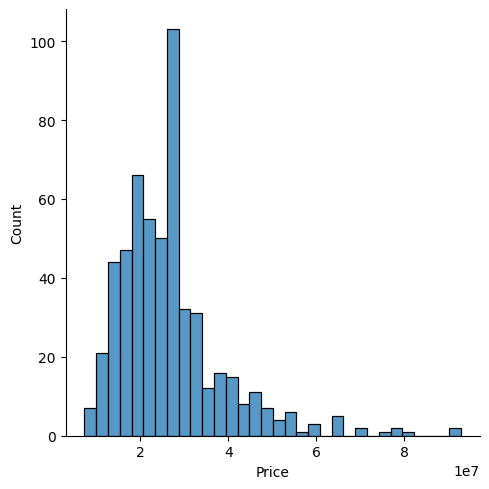

In [494]:
sns.displot(df['Price']) #tạo một đồ thị phân phối (distribution plot) của cột 'Price' trong DataFrame df

<Axes: >

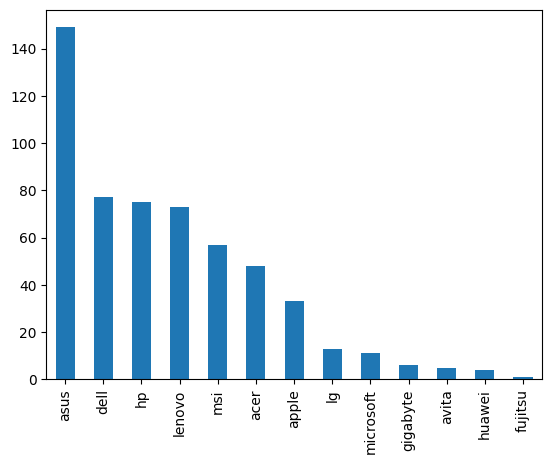

In [495]:
df['Brand'].value_counts().plot(kind='bar') 
#value_counts()để đếm số lượng lần xuất hiện của mỗi giá trị trong cột Company
#kind='bar' xác định loại biểu đồ là biểu đồ cột.

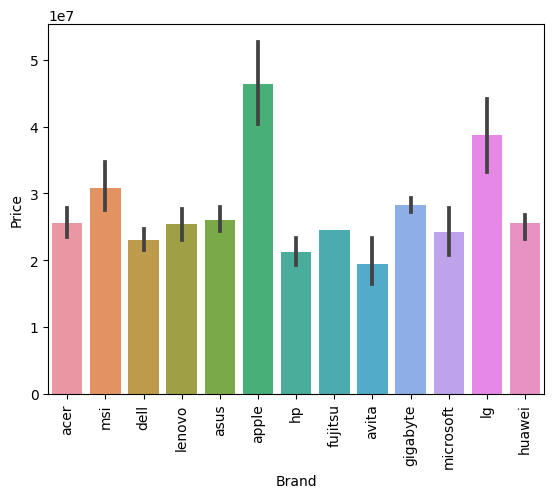

In [496]:
sns.barplot(x=df['Brand'],y=df['Price']) #trục x là các giá trị công ty, trục y là giá trị trung bình của cột 'Price_euros'
plt.xticks(rotation='vertical') #nhãn trục x được xoay theo chiều dọc để dễ đọc
plt.show()

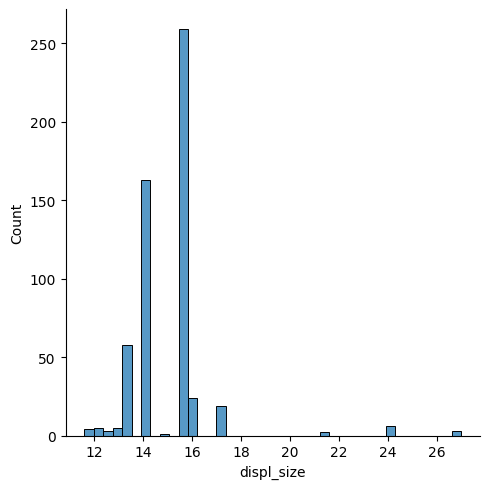

In [498]:
sns.displot(df['displ_size'])

<Axes: xlabel='displ_size', ylabel='Price'>

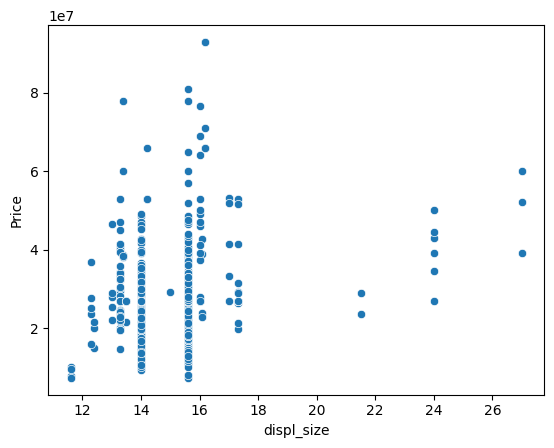

In [499]:
sns.scatterplot(x=df['displ_size'],y=df['Price'])#tạo một biểu đồ phân tán (scatter plot)

# 6. Feature Engineering

In [500]:
df['displ_resolution'].value_counts()

1920 x 1080    410
2560 x 1600     34
1366 x 768      29
2560 x 1440     14
1920 x 1200      9
3840 x 2160      7
1920x1080        7
4480 x 2520      6
2736 x 1824      5
3456 x 2234      5
2256 x 1504      4
2160 x 1350      3
3024 x 1964      3
1536 x 1024      3
5120 x 2880      3
2160 x 1440      2
3840 x 2400      1
2240 x 1400      1
2880 x 1800      1
1440 x 900       1
3000 x 2000      1
4096 x 2304      1
2560 x 1080      1
3072 x 1920      1
Name: displ_resolution, dtype: int64

In [501]:
df.sample(5)

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
230,189,27790000.0,asus,intel,8,512,15.6,144,48.0,windows 10,1920 x 1080,2.30,yes,ips,yes,nvidia,1920,1080,141.211998
170,1518,17144500.0,msi,amd,8,512,14.0,60,65.0,windows 10,1920 x 1080,1.30,yes,led,yes,amd,1920,1080,157.350512
87,0,41590000.0,hp,intel,16,1024,14.0,60,53.0,windows 10,1920 x 1080,1.35,yes,ips,no,nvidia,1920,1080,157.350512
509,8,41400000.0,lg,intel,16,256,17.0,60,80.0,free os,2560 x 1600,1.35,no,ips,yes,intel,2560,1600,177.580821
317,13,32990000.0,asus,amd,16,512,15.6,144,90.0,windows 10,1920 x 1080,1.90,yes,ips,yes,nvidia,1920,1080,141.211998


<Axes: >

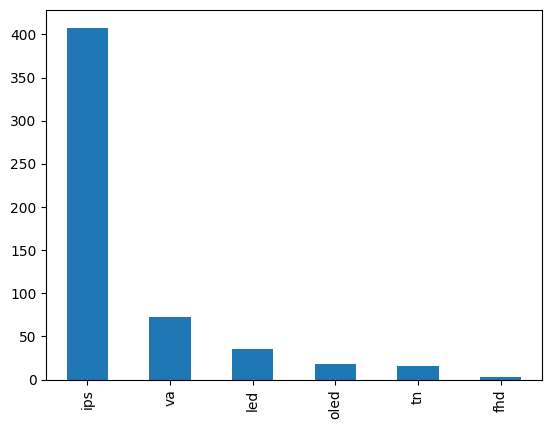

In [502]:
df['screen_technology'].value_counts().plot(kind='bar')

<Axes: xlabel='screen_technology', ylabel='Price'>

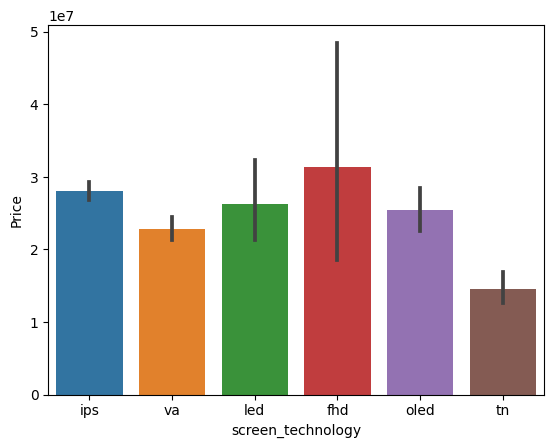

In [503]:
sns.barplot(x=df['screen_technology'],y=df['Price'])

In [504]:
df.select_dtypes(include='number').corr()['Price']

Comment_count   -0.191699
Price            1.000000
ram_size         0.764425
storage_size     0.606366
displ_size       0.209478
displ_rate       0.404376
Battery          0.388475
Weight           0.236257
X_res            0.559814
Y_res            0.594527
ppi              0.527802
Name: Price, dtype: float64

In [505]:
df.drop(columns=['displ_resolution'],inplace=True)

In [506]:
df.drop(columns=['displ_size','X_res','Y_res'],inplace=True)

In [507]:
df.head()

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,yes,ips,yes,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,yes,ips,no,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,yes,va,yes,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.597546,windows 10,1.65,yes,led,yes,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,yes,ips,yes,intel,141.211998


In [508]:
df['cpu_brand'].value_counts()

intel    402
amd      127
apple     23
Name: cpu_brand, dtype: int64

<Axes: >

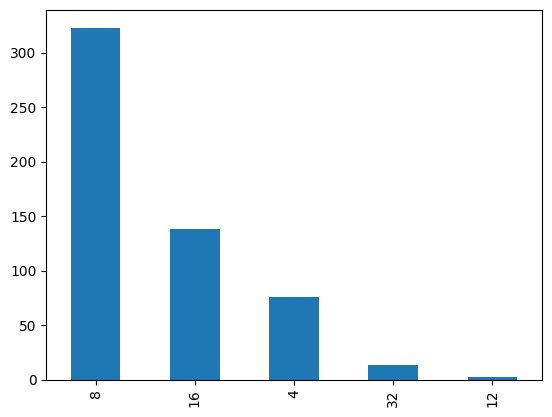

In [509]:
df['ram_size'].value_counts().plot(kind='bar')

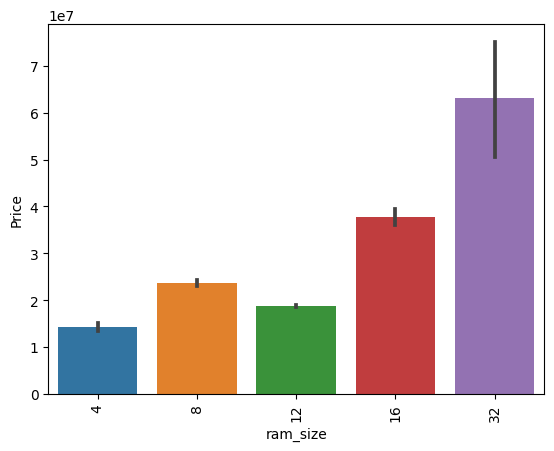

In [510]:
sns.barplot(x=df['ram_size'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [511]:
df['storage_size'].value_counts()

512     358
256     110
1024     52
128      25
2048      5
32        1
64        1
Name: storage_size, dtype: int64

In [512]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,yes,ips,yes,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,yes,ips,no,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,yes,va,yes,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.597546,windows 10,1.65,yes,led,yes,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,yes,ips,yes,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,60,47.000000,windows 10,1.27,no,ips,no,amd,200.842560
548,21,14990000.00,microsoft,intel,4,64,60,57.597546,windows 10,1.11,no,ips,no,intel,148.874375
549,76,21590000.00,microsoft,intel,8,256,60,57.597546,windows 10,1.11,no,ips,no,intel,148.874375
550,49,15990000.00,microsoft,intel,4,128,60,43.000000,windows 10,0.00,no,ips,no,intel,267.338436


In [513]:
df['GPU_brand'].value_counts()

intel     247
nvidia    217
amd        66
m1         22
Name: GPU_brand, dtype: int64

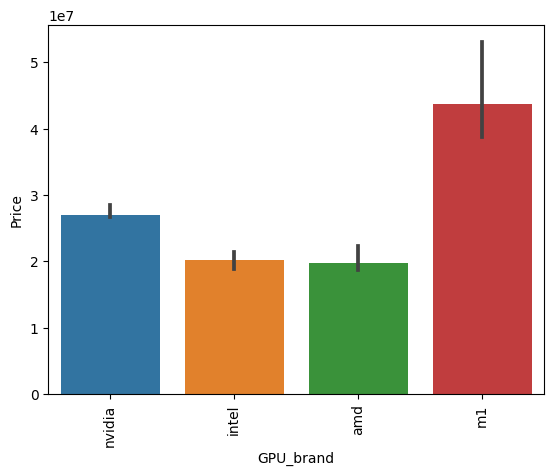

In [514]:
sns.barplot(x=df['GPU_brand'],y=df['Price'],estimator=np.median) #estimator=np.median tính giá trị trung vị (median) của các mẫu có cùng giá trị trên trục x.
plt.xticks(rotation='vertical')
plt.show()

In [515]:
df['OS'].value_counts()

windows 10    487
mac os         33
windows 11     24
free os         8
Name: OS, dtype: int64

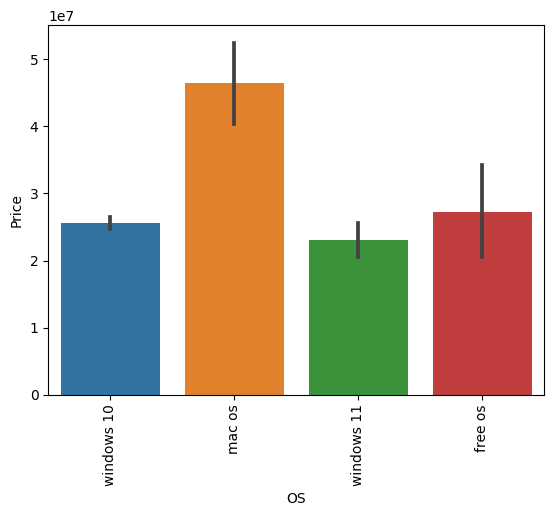

In [516]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

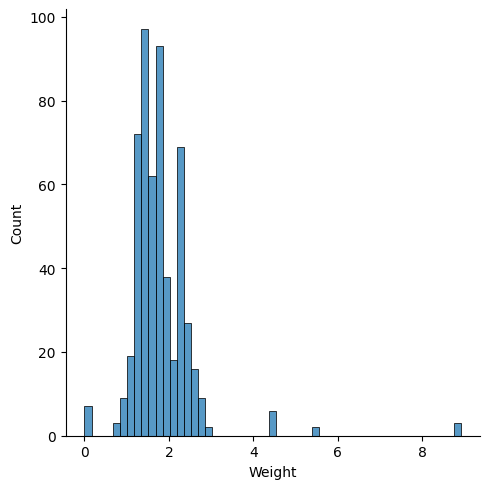

In [517]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

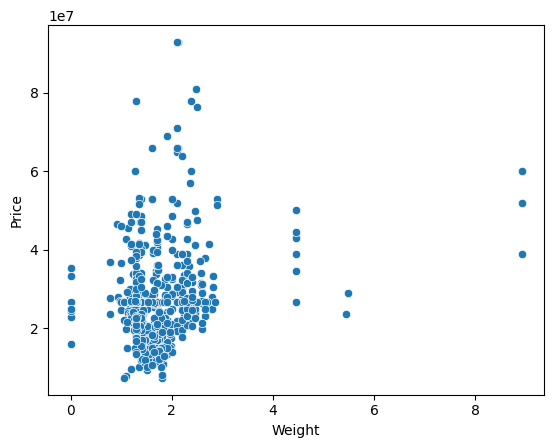

In [518]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [519]:
df['storage_extra_slot'] = df['storage_extra_slot'].map({'yes': 1, 'no': 0})
df['ram_upgradable'] = df['ram_upgradable'].map({'yes': 1, 'no': 0})

In [520]:
df.select_dtypes(include='number').corr()['Price']

Comment_count        -0.191699
Price                 1.000000
ram_size              0.764425
storage_size          0.606366
displ_rate            0.404376
Battery               0.388475
Weight                0.236257
ram_upgradable       -0.165225
storage_extra_slot   -0.106249
ppi                   0.527802
Name: Price, dtype: float64

<Axes: >

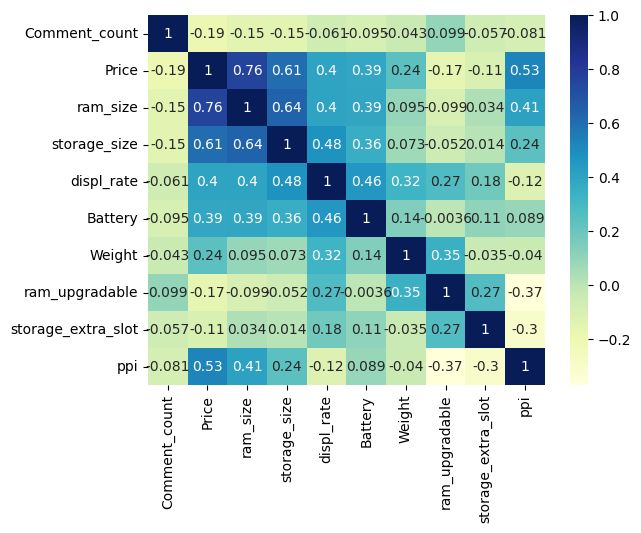

In [521]:
# Explicitly specifying numeric_only=True to avoid the warning
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
#annot=True hiển thị giá trị của mỗi ô trong biểu đồ. Giá trị của mỗi ô thể hiện mức độ tương quan giữa hai biến
#cmap = "YlGnBu"  xanh sáng sẽ được sử dụng cho các giá trị tương quan cao, trong khi màu xanh lá cây và xanh dương sẽ được sử dụng cho các giá trị tương quan thấp hơn

Giá trị dương: Chỉ ra sự tương quan thuận, tức là khi một biến tăng, biến còn lại cũng tăng. Một giá trị dương lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Giá trị âm: Chỉ ra sự tương quan nghịch, tức là khi một biến tăng, biến còn lại giảm. Một giá trị âm lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Biểu đồ heatmap sử dụng các màu sắc để đại diện cho các giá trị tương quan, trong đó các giá trị dương thường được hiển thị bằng màu sáng hơn (ví dụ: màu xanh lá cây hoặc màu vàng) và các giá trị âm thường được hiển thị bằng màu tối hơn (ví dụ: màu xanh đậm hoặc màu tím)

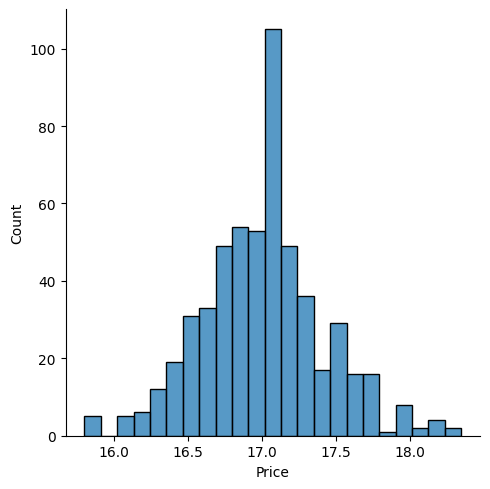

In [522]:
sns.displot(np.log(df['Price']))

In [523]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

#sử dụng hàm 'np.log' từ thư viện NumPy để tính logarit tự nhiên của các giá trị trong cột 'Price_euros'. Điều này thường được thực hiện khi giá trị đầu ra có phân phối không đồng đều và áp dụng logarit có thể giúp đưa dữ liệu
# về phân phối gần hơn với phân phối chuẩn và giúp mô hình học tốt hơn.

In [524]:
X

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,lenovo,intel,8,512,60,57.597546,windows 10,1.65,1,led,1,intel,141.211998
4,1244,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,microsoft,intel,4,64,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
549,76,microsoft,intel,8,256,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
550,49,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [525]:
y

0      17.169838
1      16.872322
2      16.543004
3      16.523494
4      16.749314
         ...    
547    17.110977
548    16.522894
549    16.887741
550    16.587474
551    17.033986
Name: Price, Length: 552, dtype: float64

In [526]:
y.sort_values(ascending=False)

17     18.348003
544    18.348003
331    18.209836
79     18.172091
318    18.172091
         ...    
357    15.893701
392    15.893701
51     15.869506
300    15.802014
391    15.802014
Name: Price, Length: 552, dtype: float64

In [527]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.597546,windows 10,1.65,1,led,1,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,14990000.00,microsoft,intel,4,64,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
549,76,21590000.00,microsoft,intel,8,256,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
550,49,15990000.00,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [528]:
# Explicitly specifying numeric_only=True to avoid the warning
target_correlations = df.corr(numeric_only=True)['Price'].apply(abs).sort_values().to_frame()

In [529]:
target_correlations 

,Price
storage_extra_slot,0.106249
ram_upgradable,0.165225
Comment_count,0.191699
Weight,0.236257
Battery,0.388475
displ_rate,0.404376
ppi,0.527802
storage_size,0.606366
ram_size,0.764425
Price,1.000000


# 7. Machine Learning Modeling

In [530]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)# 85% là huấn luyện
#random_state giúp mỗi lần chạy mô hình sẽ cho ra cùng một kết quả, giúp cho việc tái sử dụng mô hình và so sánh giữa các kết quả được đánh giá đúng dễ dàng hơn.

In [531]:
X_train

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
543,7,apple,apple,16,1024,120,57.597546,mac os,2.10,0,ips,0,m1,254.023349
7,32,msi,intel,8,512,144,57.597546,windows 10,2.10,1,ips,1,nvidia,141.211998
420,12,dell,intel,8,512,60,40.000000,windows 10,1.06,0,va,1,intel,165.632118
376,121,asus,intel,8,512,60,50.000000,windows 10,1.40,0,ips,1,intel,157.350512
266,306,apple,intel,8,128,60,54.000000,mac os,1.35,1,ips,0,intel,127.677940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,33,acer,intel,8,512,60,40.000000,windows 10,1.37,0,ips,1,intel,157.350512
534,0,msi,intel,32,1024,60,82.000000,windows 10,1.69,0,ips,1,nvidia,282.423996
493,76,lenovo,amd,8,512,165,60.000000,windows 10,2.40,1,ips,1,nvidia,141.211998
527,117,msi,intel,8,512,60,52.000000,windows 10,1.30,1,ips,0,nvidia,157.350512


In [532]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [533]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [534]:
def is_invalid_string(value):
    try:
        float(value)
        return False
    except ValueError:
        return True

# Áp dụng hàm kiểm tra cho từng phần tử trong DataFrame
invalid_values = df.applymap(is_invalid_string)

# Kiểm tra cột nào chứa giá trị chuỗi không hợp lệ
invalid_columns = invalid_values.any()
print(invalid_columns)

Comment_count         False
Price                 False
Brand                  True
cpu_brand              True
ram_size              False
storage_size          False
displ_rate            False
Battery               False
OS                     True
Weight                False
ram_upgradable        False
screen_technology      True
storage_extra_slot    False
GPU_brand              True
ppi                   False
dtype: bool


In [535]:
X

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,lenovo,intel,8,512,60,57.597546,windows 10,1.65,1,led,1,intel,141.211998
4,1244,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,microsoft,intel,4,64,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
549,76,microsoft,intel,8,256,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
550,49,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


### KNN

In [540]:
from sklearn.metrics import r2_score, mean_absolute_error


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [1, 2, 7, 10, 12])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3, metric='manhattan')

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.5691579057209777
MAE: 0.18115918429256622


In [541]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=3)

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.4688091  0.3963579  0.33200978 0.45793732 0.51659556]
Mean R2 score: 0.4343419308956955


In [543]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_test_pred = knn_model.fit(X_train_transformed, y_train).predict(X_test_transformed)
    test_r2 = r2_score(y_test, y_test_pred)

    print("k:", k, "   R2:", test_r2)
    
    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

k: 1    R2: 0.30079888072526906
k: 2    R2: 0.5223397873789591
k: 3    R2: 0.5621424809024351
k: 4    R2: 0.550402213480356
k: 5    R2: 0.5640987920631699
k: 6    R2: 0.5818782888377467
k: 7    R2: 0.5734661209010632
k: 8    R2: 0.5713393861258824
k: 9    R2: 0.5501654573474417
Best k: 6
Best R2 score: 0.5818782888377467


k: 1    R2: 0.30079888072526906
k: 2    R2: 0.5223397873789591
k: 3    R2: 0.5621424809024351
k: 4    R2: 0.550402213480356
k: 5    R2: 0.5640987920631699
k: 6    R2: 0.5818782888377467
k: 7    R2: 0.5734661209010632
k: 8    R2: 0.5713393861258824
k: 9    R2: 0.5501654573474417
Best k: 6
Best R2 score: 0.5818782888377467


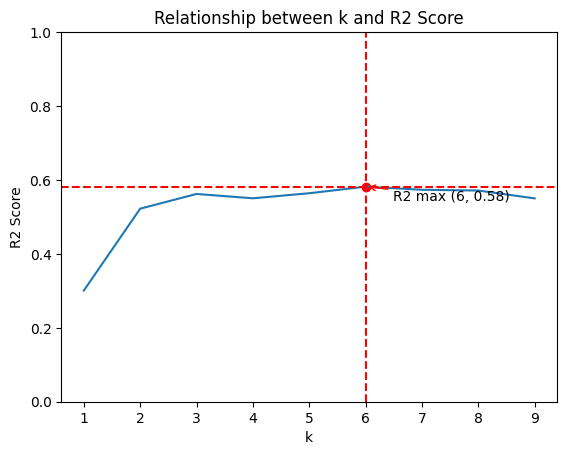

In [547]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None
# Lưu các giá trị k và R2 vào các danh sách
k_values = []
r2_scores = []

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_test_pred = knn_model.fit(X_train_transformed, y_train).predict(X_test_transformed)
    test_r2 = r2_score(y_test, y_test_pred)

    k_values.append(k)
    r2_scores.append(test_r2)

    print("k:", k, "   R2:", test_r2)
    
    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

# Vẽ đồ thị
plt.plot(k_values, r2_scores)
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Relationship between k and R2 Score')
plt.ylim(0, 1)  # Chia giá trị R2 từ 0 đến 1 trên trục y
# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
for i in range(len(k_values)):
    k = k_values[i]
    test_r2 = r2_scores[i]

    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

# Đánh dấu điểm R2 tối đa
plt.scatter(best_k, best_score, color='red')
plt.annotate(f'R2 max ({best_k}, {best_score:.2f})', (best_k, best_score), xytext=(20, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
# Vẽ đường gióng xuống các trục đồ thị cho điểm tối đa
plt.axvline(x=best_k, color='red', linestyle='--')
plt.axhline(y=best_score, color='red', linestyle='--')


plt.show()

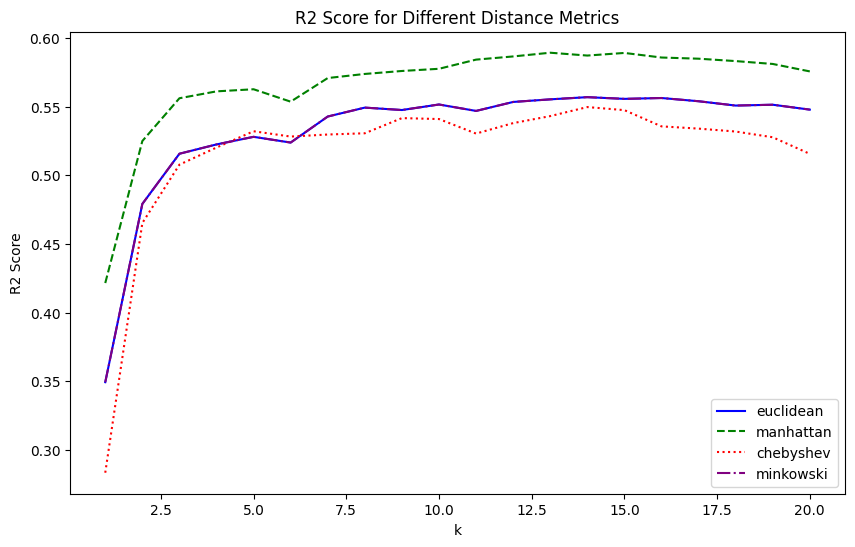

In [549]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)

# Các hàm đo khoảng cách cần được so sánh
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Các giá trị k
k_values = range(1, 21)

# Tạo một danh sách để lưu kết quả R2 scores
r2_scores = {}

# Các kiểu đường và màu sắc tương ứng
line_styles = ['-', '--', ':', '-.']
colors = ['blue', 'green', 'red', 'purple']

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
for i, metric in enumerate(distance_metrics):
    knn_model = KNeighborsRegressor(metric=metric)
    scores = []
    for k in k_values:
        knn_model.set_params(n_neighbors=k)
        cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
        scores.append(cv_scores.mean())
    r2_scores[metric] = scores
    plt.plot(k_values, r2_scores[metric], label=metric, linestyle=line_styles[i], color=colors[i])

plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Distance Metrics')
plt.legend()
plt.show()

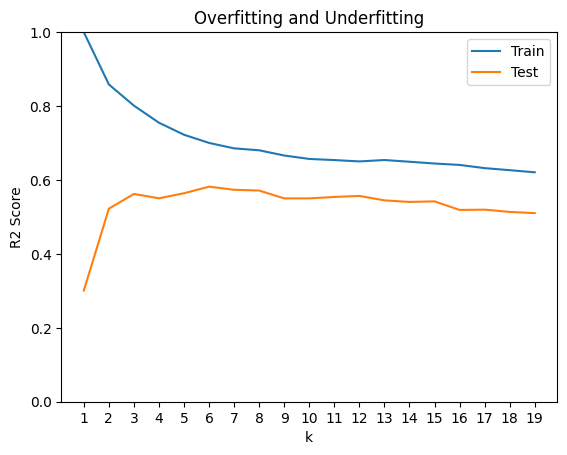

In [551]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

for k in k_values:
    # Tạo mô hình kNN với giá trị k hiện tại
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập huấn luyện
    knn_model.fit(X_train_transformed, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = knn_model.predict(X_train_transformed)
    y_test_pred = knn_model.predict(X_test_transformed)
    
    # Tính R2 score trên tập huấn luyện và tập kiểm tra
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Lưu R2 scores vào danh sách
    train_scores.append(train_score)
    test_scores.append(test_score)

# Vẽ đồ thị R2 scores
plt.plot(k_values, train_scores, label='Train')
plt.plot(k_values, test_scores, label='Test')
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Overfitting and Underfitting')
plt.legend()

# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
plt.ylim(0, 1)
plt.show()


In [552]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[1, 2, 7, 10, 12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')



pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.5691579057209777


In [553]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.47016705 0.46174651 0.34083807 0.47262512 0.61137862]
Mean R2 score: 0.47135107220946315


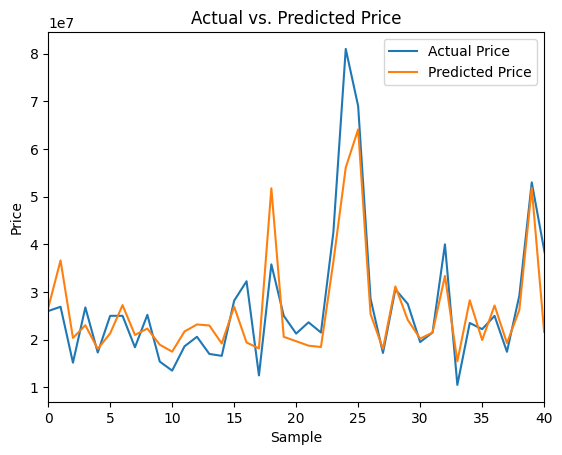

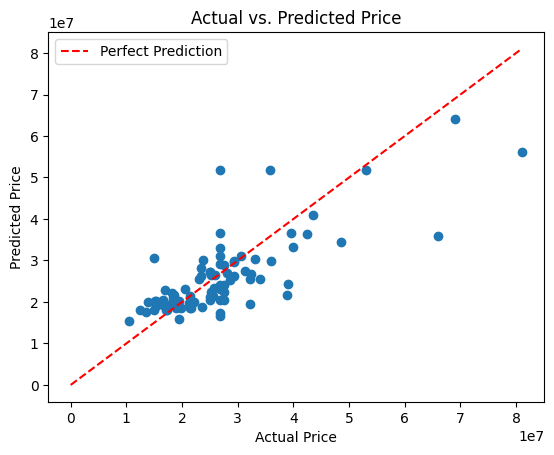

In [554]:

# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=3)
    
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train_transformed, y_train)
    
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
    
# Tính R2 score trên tập huấn luyện và tập kiểm tra
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
    
# Lưu R2 scores vào danh sách
train_scores.append(train_score)
test_scores.append(test_score)

# # Vẽ đồ thị R2 scores
# plt.plot(k_values, train_scores, label='Train')
# plt.plot(k_values, test_scores, label='Test')
# plt.xlabel('k')
# plt.ylabel('R2 Score')
# plt.title('Overfitting and Underfitting')
# plt.legend()


# Chuẩn bị dữ liệu
x_values = range(len(y_test))
y_true = np.exp(y_test)  # Chuyển đổi giá trị log về giá chính xác
y_pred = np.exp(y_test_pred)  # Chuyển đổi giá trị log về giá dự đoán

# Vẽ đồ thị
plt.plot(x_values, y_true, label='Actual Price')
plt.plot(x_values, y_pred, label='Predicted Price')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()

# Đặt giới hạn cho trục x
plt.xlim(0, 40)


plt.show()

# Vẽ đồ thị scatter
plt.scatter(y_true, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')

# Vẽ đường thẳng y = x để so sánh
max_value = max(np.max(y_true), np.max(y_pred))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.show()



In [555]:
import time

# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')
    
start_training_time = time.time()
knn_model.fit(X_train_transformed, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

start_prediction_time = time.time()
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

start_time = time.time()
y_pred = knn_model.predict(X_test_transformed)
end_time = time.time()
total_runtime = end_time - start_time

print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")
print("Total runtime:", total_runtime, "seconds")

Training time: 0.002992391586303711 seconds
Prediction time: 0.026926279067993164 seconds
Total runtime: 0.004988193511962891 seconds


### Random Forest Regressor 

In [ ]:
#RandomForestClassifierđược sử dụng cho các nhiệm vụ phân loại, trong đó mục tiêu là dự đoán nhãn hoặc lớp phân loại. Nó thường được sử dụng cho các tác vụ như phát hiện thư rác, phân tích tình cảm hoặc phân loại hình ảnh.
#RandomForestRegressorđược sử dụng cho các tác vụ hồi quy, trong đó mục tiêu là dự đoán một giá trị số liên tục. Nó thường được sử dụng cho các nhiệm vụ như dự đoán giá nhà đất, giá cổ phiếu hoặc dự báo doanh số bán hàng.

In [ ]:
# Overfitting Là hiện tượng mô hình ghi nhớ quá tốt dữ liệu huấn luyện và phụ thuộc vào nó, việc này khiến cho mô hình không thể tổng quát hóa các quy luật để hoạt động với dữ liệu chưa từng được chứng kiến.

In [559]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('Test R2 score:', r2_score(y_test, y_pred)) # R2 để đánh giá khả năng dự đoán của mô hình trên dữ liệu chưa được huấn luyện.
print('MAE:', mean_absolute_error(y_test, y_pred)) #MAE đo độ lớn trung bình của sai số tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.


Test R2 score: 0.659959137352496
MAE: 0.1561970736746235


In [557]:
#cross validation

In [560]:
from sklearn.model_selection import cross_val_score

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
# Thực hiện cross-validation với k-fold
k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring='r2')

# In kết quả đánh giá từng fold
for fold_idx, score in enumerate(scores):
    print(f"Fold {fold_idx+1}: R^2 = {score}")
cv_mae = -cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

# Tính trung bình và độ lệch chuẩn của kết quả
mean_score = scores.mean()
std_score = scores.std()
print("Mean R^2:", mean_score)
print("Standard Deviation:", std_score)
print("Cross-Validation MAE:", cv_mae)


C:\Users\DELL\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fold 1: R^2 = 0.7957474276741876
Fold 2: R^2 = 0.7861028766884128
Fold 3: R^2 = 0.7824645717770536
Fold 4: R^2 = 0.7132186907460945
Fold 5: R^2 = 0.8132924490836553


C:\Users\DELL\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Mean R^2: 0.7781652031938807
Standard Deviation: 0.034183618097933445
Cross-Validation MAE: 0.15161606665778146


In [561]:
#holdout validation

In [564]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=3)

# Định nghĩa các bước xử lý và mô hình
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
], remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Huấn luyện mô hình trên tập huấn luyện
pipe.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = pipe.predict(X_val)

# Đánh giá hiệu suất trên tập validation
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# In kết quả
print("Mean Absolute Error on Validation Set:", mae)
print("R2 Score on Validation Set:", r2)


Mean Absolute Error on Validation Set: 0.13585011909881786
R2 Score on Validation Set: 0.8094967753246329


In [565]:
# Out-of-bag (OOB) là một phương pháp đánh giá hiệu suất mô hình trong quá trình huấn luyện cây quyết định trong thuật toán Random Forest. Trong Random Forest, mỗi cây quyết định được huấn luyện trên một mẫu dữ liệu con được chọn ngẫu nhiên từ tập huấn luyện. Một số mẫu dữ liệu không được chọn trong quá trình huấn luyện của cây đó được gọi là "out-of-bag" samples.

# Ý tưởng của OOB là sử dụng các mẫu dữ liệu OOB để đánh giá hiệu suất mô hình mà không cần sử dụng tập dữ liệu kiểm tra riêng biệt. Mỗi mẫu dữ liệu OOB chỉ được dùng để đánh giá bởi những cây quyết định không sử dụng nó trong quá trình huấn luyện.

# Sau khi huấn luyện Random Forest, OOB evaluation tính toán các dự đoán trên các mẫu dữ liệu OOB bằng cách sử dụng chỉ các cây quyết định không sử dụng mẫu đó trong quá trình huấn luyện. Kết quả của OOB evaluation được sử dụng để đánh giá hiệu suất của mô hình, ví dụ như tính R2 score, mean absolute error (MAE), v.v.

# OOB evaluation cung cấp một phương pháp đơn giản và tiện lợi để đánh giá hiệu suất mô hình Random Forest mà không cần phải chia tập dữ liệu thành tập huấn luyện và tập kiểm tra riêng biệt.

In [567]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
], remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    oob_score=True  # Sử dụng OOB evaluation
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

oob_r2 = pipe['step2'].oob_score_
oob_mae = mean_absolute_error(y_train, pipe['step2'].oob_prediction_)

print('OOB R2 score:', oob_r2)
print('OOB MAE:', oob_mae)


OOB R2 score: 0.7422606014297934
OOB MAE: 0.1473184073378206


In [569]:
target_correlations = df.corr(numeric_only=True)['Price'].apply(abs).sort_values().to_frame()

In [570]:
target_correlations

,Price
storage_extra_slot,0.106249
ram_upgradable,0.165225
Comment_count,0.191699
Weight,0.236257
Battery,0.388475
displ_rate,0.404376
ppi,0.527802
storage_size,0.606366
ram_size,0.764425
Price,1.000000


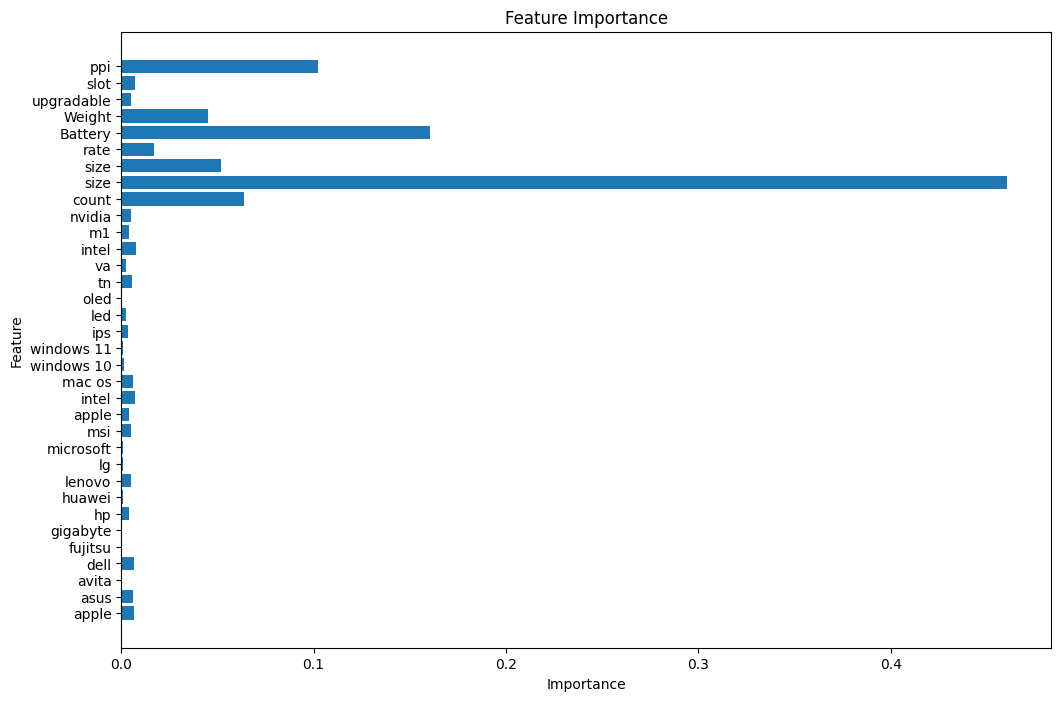

In [571]:
import matplotlib.pyplot as plt

# Lấy mức độ quan trọng của các biến từ mô hình
feature_importances = pipe.named_steps['step2'].feature_importances_

# Lấy tên toàn bộ các biến từ ColumnTransformer
feature_names = pipe.named_steps['step1'].get_feature_names_out()

# Rút gọn tên các biến
shortened_names = [name.rsplit('_', 1)[-1] for name in feature_names]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Đặt nhãn cho trục y với tên các biến đã rút gọn
plt.yticks(range(len(shortened_names)), shortened_names)

plt.show()


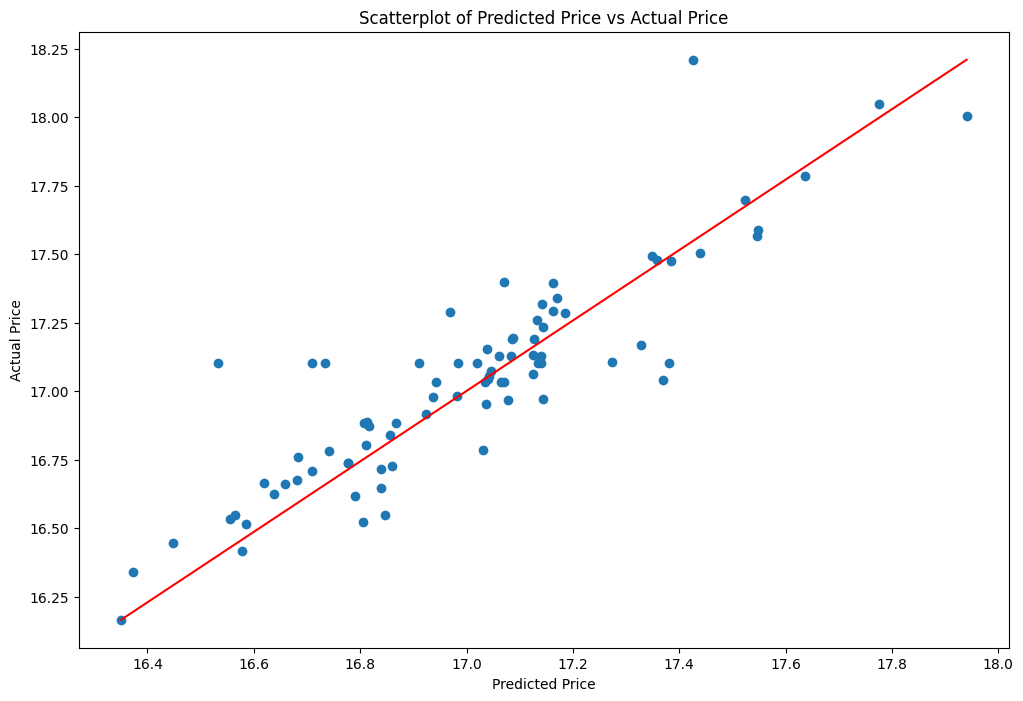

In [572]:
import matplotlib.pyplot as plt
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Scatterplot of Predicted Price vs Actual Price')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red')
plt.show()

In [573]:
#Đánh giá mức độ quan trọng của các biến

In [574]:
#thay đổi n_estimators
# Khi giá trị của n_estimators càng lớn, mô hình sẽ có nhiều cây quyết định hơn, và sự phức tạp của mô hình cũng tăng lên. Tuy nhiên, việc tăng số lượng cây quyết định cũng có thể làm tăng thời gian huấn luyện của mô hình.

#Thông thường, một giá trị n_estimators đủ lớn sẽ cung cấp hiệu suất tốt cho mô hình Random Forest,

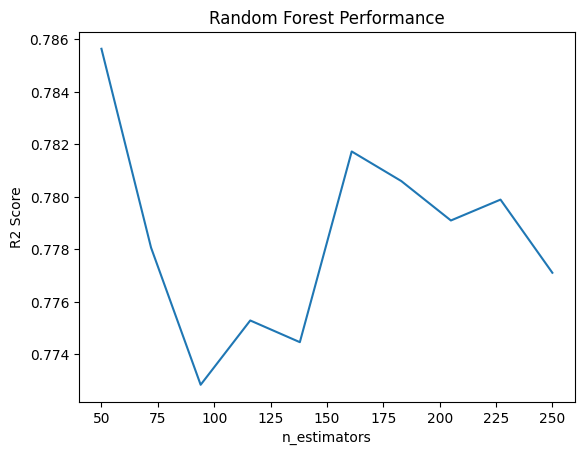

Max R2 Score: 0.7856347407675075
Best n_estimators: 50


In [575]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị n_estimators liên tục
n_estimators_values = np.linspace(50, 250, 10).astype(int)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for n_estimators in n_estimators_values:
    step2 = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và chỉ mục tương ứng
max_r2 = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_n_estimators = n_estimators_values[max_r2_index]

# Vẽ đồ thị biểu diễn R2 Score theo giá trị n_estimators
plt.plot(n_estimators_values, r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

print('Max R2 Score:', max_r2)
print('Best n_estimators:', best_n_estimators)


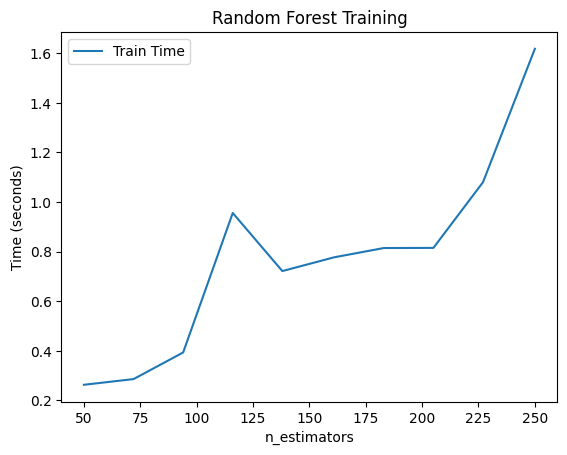

In [576]:
import time
import matplotlib.pyplot as plt

# Khoảng giá trị n_estimators liên tục
n_estimators_values = np.linspace(50, 250, 10).astype(int)
train_times = []
test_times = []

for n_estimators in n_estimators_values:
    step2 = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    # Đo thời gian chạy train
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Đo thời gian chạy test
    start_time = time.time()
    y_pred = pipe.predict(X_test)
    test_time = time.time() - start_time

    train_times.append(train_time)
    test_times.append(test_time)

# Vẽ đồ thị biểu diễn thời gian chạy train và test theo giá trị n_estimators
plt.plot(n_estimators_values, train_times, label='Train Time')
#plt.plot(n_estimators_values, test_times, label='Test Time')
plt.xlabel('n_estimators')
plt.ylabel('Time (seconds)')
plt.title('Random Forest Training')
plt.legend()
plt.show()


In [577]:
#max_samples xác định số lượng mẫu (samples) tối đa được sử dụng để huấn luyện mỗi cây trong rừng ngẫu nhiên
#Tham số max_samples có thể giúp kiểm soát sự đa dạng của các cây trong rừng ngẫu nhiên và ngăn chặn việc overfitting. Bằng cách giới hạn số lượng mẫu được sử dụng cho mỗi cây, nó giúp mô hình học từ các tập dữ liệu con và có khả năng tổng quát hóa tốt hơn trên dữ liệu mới.

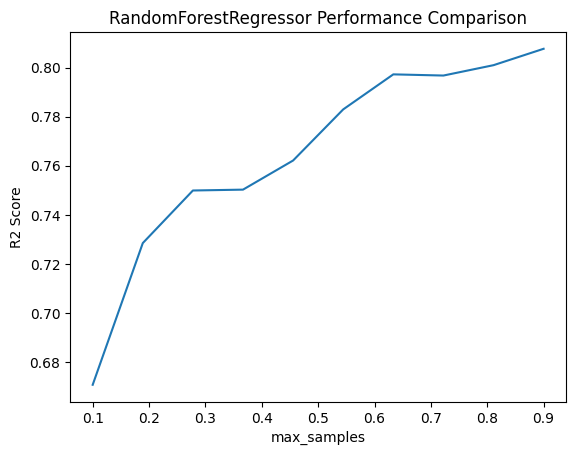

Highest R2 Score: 0.8076409600229
Corresponding max_samples value: 0.9


In [578]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị max_samples liên tục
max_samples_values = np.linspace(0.1, 0.9, 10)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_samples in max_samples_values:
    step1 = ColumnTransformer(transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1, 2, 7, 10, 12])
    ], remainder='passthrough')
    
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=max_samples,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
max_samples = max_samples_values[max_r2_index]


# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_samples
plt.plot(max_samples_values, r2_scores)
plt.xlabel('max_samples')
plt.ylabel('R2 Score')
plt.title('RandomForestRegressor Performance Comparison')
plt.show()
# In ra giá trị R2 Score cao nhất và vị trí tương ứng
print("Highest R2 Score:", max_r2_score)
print("Corresponding max_samples value:", max_samples)


In [579]:
#max_features là một siêu tham số (hyperparameter) quy định số lượng features (đặc trưng) được sử dụng để xây dựng các cây quyết định trong mỗi lần phân chia.
#Lựa chọn max_features có thể ảnh hưởng đến hiệu suất và tính tổng quát của mô hình Random Forest. Qua việc giới hạn số lượng đặc trưng sử dụng trong quá trình phân chia, nó có thể giúp tránh overfitting và cải thiện khả năng tổng quát hóa của mô hình. Tuy nhiên, lựa chọn thích hợp cho max_features thường cần được điều chỉnh thông qua việc thử nghiệm và đánh giá mô hình trên tập dữ liệu kiểm tra.

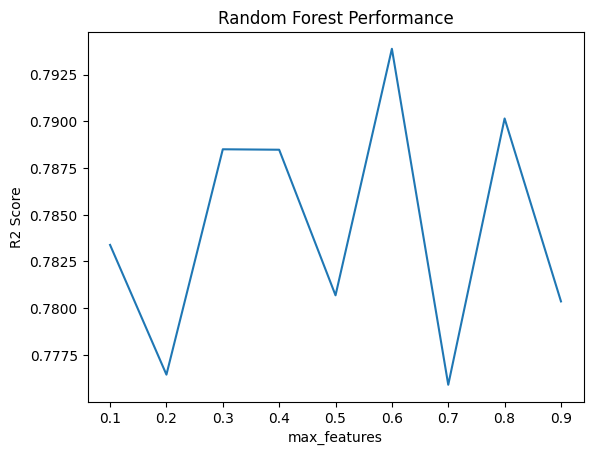

Highest R2 Score: 0.7938843511961364
Best max_features: 0.6


In [580]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Danh sách các giá trị max_features để thử
max_features_values = np.arange(0.1, 1, 0.1)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_features in max_features_values:
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=0.5,
        max_features=max_features,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)  # Đánh giá R2 Score trên tập kiểm tra
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_max_features = max_features_values[max_r2_index]


# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_features
plt.plot(max_features_values, r2_scores)
plt.xlabel('max_features')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

print("Highest R2 Score:", max_r2_score)
print("Best max_features:", best_max_features)


In [581]:
#max_depth xác định độ sâu tối đa của cây quyết định trong mô hình Random Forest. max_depth quyết định số lượng tầng của cây và sự phân chia của các node trong cây.
#Giá trị max_depth ảnh hưởng đến hiệu suất của mô hình. Một giá trị max_depth quá lớn có thể dẫn đến overfitting (quá khớp), trong đó mô hình học "quá nhớ" các mẫu huấn luyện cụ thể nhưng không tổng quát hóa tốt cho dữ liệu mới. Ngược lại, một giá trị max_depth quá nhỏ có thể dẫn đến underfitting (thiếu khớp), trong đó mô hình không học đủ thông tin từ dữ liệu huấn luyện.

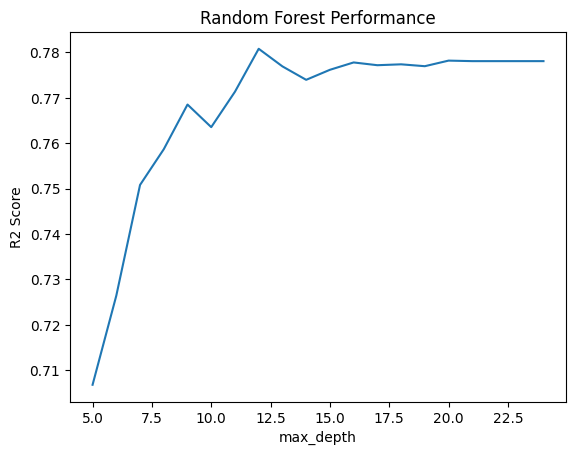

Highest R2 Score: 0.7807785097434257
Best max_depth: 12


In [582]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị liên tục để thử
max_depth_values = np.arange(5, 25, 1)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_depth in max_depth_values:
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=max_depth
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)  # Đánh giá R2 Score trên tập kiểm tra
    r2_scores.append(r2)

# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_depth
plt.plot(max_depth_values, r2_scores)
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_max_depth = max_depth_values[max_r2_index]

print("Highest R2 Score:", max_r2_score)
print("Best max_depth:", best_max_depth)

In [583]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[1, 2, 7, 10, 12])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=227,
    random_state=3,
    max_samples=0.9,
    max_features=0.3,
    max_depth=16
)

pipe1 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)

print('Test R2 score:', r2_score(y_test, y_pred)) # R2 để đánh giá khả năng dự đoán của mô hình trên dữ liệu chưa được huấn luyện.
print('MAE:', mean_absolute_error(y_test, y_pred)) #MAE đo độ lớn trung bình của sai số tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.


Test R2 score: 0.8088868885622655
MAE: 0.09806555068554834


In [584]:
import time

# Bắt đầu đếm thời gian train
start_train_time = time.time()

# Train mô hình
pipe1.fit(X_train, y_train)

# Kết thúc đếm thời gian train và tính thời gian train
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Bắt đầu đếm thời gian test
start_test_time = time.time()

# Dự đoán trên dữ liệu test
y_pred = pipe1.predict(X_test)

# Kết thúc đếm thời gian test và tính thời gian test
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Tính tổng thời gian (train + test)
total_time = train_time + test_time

# In kết quả
print('Training time:', train_time, 'seconds')
print('Prediction time:', test_time, 'seconds')
print('Total time:', total_time, 'seconds')


Training time: 0.901125431060791 seconds
Prediction time: 0.04439115524291992 seconds
Total time: 0.9455165863037109 seconds


### Exporting the Model

In [585]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [586]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.597546,windows 10,1.65,1,led,1,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,14990000.00,microsoft,intel,4,64,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
549,76,21590000.00,microsoft,intel,8,256,60,57.597546,windows 10,1.11,0,ips,0,intel,148.874375
550,49,15990000.00,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [587]:
X_train

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
374,190,asus,intel,8,256,60,37.0,windows 10,1.68,1,ips,1,intel,141.211998
486,0,lenovo,amd,16,512,120,75.0,windows 10,1.90,1,ips,1,nvidia,188.679623
25,8,hp,intel,16,1024,144,200.0,windows 10,2.30,1,ips,1,nvidia,136.826532
136,1476,asus,intel,4,256,60,37.0,windows 10,1.80,1,ips,1,intel,141.211998
243,741,dell,intel,8,512,60,54.0,windows 10,1.75,1,va,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,94,lenovo,intel,8,256,60,38.0,windows 10,1.65,1,tn,1,intel,141.211998
422,26,dell,intel,16,512,60,40.0,windows 10,1.64,1,va,1,nvidia,141.211998
119,163,lenovo,intel,8,512,60,56.0,windows 10,1.27,1,ips,0,intel,157.350512
256,89,asus,intel,8,512,60,37.0,windows 11,1.55,1,ips,1,intel,157.350512


In [588]:
df.dtypes


Comment_count           int64
Price                 float64
Brand                  object
cpu_brand              object
ram_size                int64
storage_size            int64
displ_rate              int64
Battery               float64
OS                     object
Weight                float64
ram_upgradable          int64
screen_technology      object
storage_extra_slot      int64
GPU_brand              object
ppi                   float64
dtype: object